In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics

In [ ]:
from google.colab import files


pd = files.upload()



Saving dataset.csv to dataset.csv


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('dataset.csv')

In [ ]:
import os
print(os.listdir())


['.config', 'dataset.csv', 'sample_data']


In [ ]:
data

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [ ]:

attributes = data.columns


print("Attributes of the Dataset:")
for attribute in attributes:
    print(attribute)

Attributes of the Dataset:
dt
switch
src
dst
pktcount
bytecount
dur
dur_nsec
tot_dur
flows
packetins
pktperflow
byteperflow
pktrate
Pairflow
Protocol
port_no
tx_bytes
rx_bytes
tx_kbps
rx_kbps
tot_kbps
label


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [ ]:
data.isna().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(5091)

In [ ]:
data2 = data.drop_duplicates()

In [ ]:
data2.isna().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98748 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt           98748 non-null  int64  
 1   switch       98748 non-null  int64  
 2   src          98748 non-null  object 
 3   dst          98748 non-null  object 
 4   pktcount     98748 non-null  int64  
 5   bytecount    98748 non-null  int64  
 6   dur          98748 non-null  int64  
 7   dur_nsec     98748 non-null  int64  
 8   tot_dur      98748 non-null  float64
 9   flows        98748 non-null  int64  
 10  packetins    98748 non-null  int64  
 11  pktperflow   98748 non-null  int64  
 12  byteperflow  98748 non-null  int64  
 13  pktrate      98748 non-null  int64  
 14  Pairflow     98748 non-null  int64  
 15  Protocol     98748 non-null  object 
 16  port_no      98748 non-null  int64  
 17  tx_bytes     98748 non-null  int64  
 18  rx_bytes     98748 non-null  int64  
 19  tx_kbps 

In [ ]:
data2.groupby('label').size()

,0
label,
0,61022
1,37726


In [ ]:


numeric_df = data2.select_dtypes(include=['int64', 'float64'])
object_df = data2.select_dtypes(include=['object'])
numeric_cols = numeric_df.columns
object_cols = object_df.columns
print('Columns with numeric format: ')
print(numeric_cols, '\n')
print('Object Pillars: ')
print(object_cols, '\n')
print('Number of columns with numeric format: ', len(numeric_cols))
print('Number of columns in the Object format: ', len(object_cols))

Columns with numeric format: 
Index(['dt', 'switch', 'pktcount', 'bytecount', 'dur', 'dur_nsec', 'tot_dur',
       'flows', 'packetins', 'pktperflow', 'byteperflow', 'pktrate',
       'Pairflow', 'port_no', 'tx_bytes', 'rx_bytes', 'tx_kbps', 'rx_kbps',
       'tot_kbps', 'label'],
      dtype='object') 

Object Pillars: 
Index(['src', 'dst', 'Protocol'], dtype='object') 

Number of columns with numeric format:  20
Number of columns in the Object format:  3


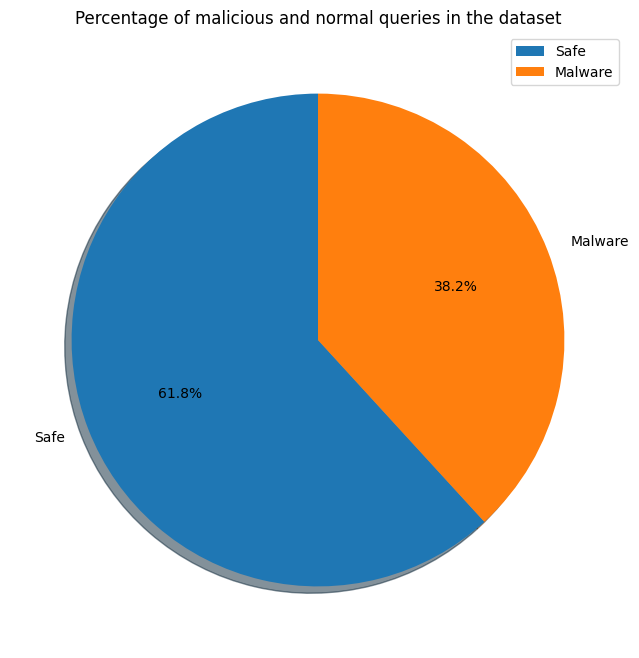

In [ ]:
labels = ["Safe", "Malware"]
sizes = [dict(data2.label.value_counts())[0], dict(data2.label.value_counts())[1]]
plt.figure(figsize=(13, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(["Safe", "Malware"])
plt.title('Percentage of malicious and normal queries in the dataset')
plt.show()


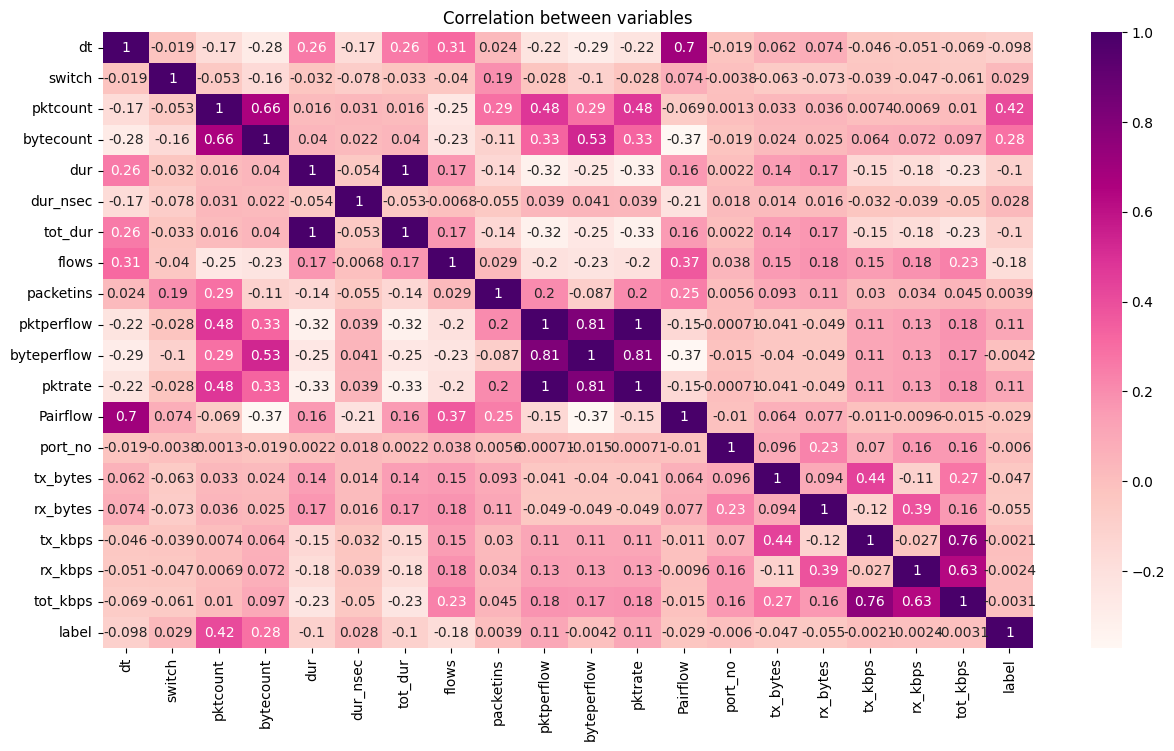

In [ ]:
numeric_data = data2.select_dtypes(include='number')#
correlation_matrix = numeric_data.corr()
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True,ax=ax,  cmap="RdPu")
plt.title('Correlation between variables')
#plt.xticks(rotation=45);
plt.show()


In [ ]:
columns_to_drop = ['switch', 'dur', 'dur_nsec', 'tot_dur', 'flows', 'packetins', 'port_no', 'tx_bytes', 'rx_bytes']
data_new = data2.drop(columns=columns_to_drop).copy()
data_new

,dt,src,dst,pktcount,bytecount,pktperflow,byteperflow,pktrate,Pairflow,Protocol,tx_kbps,rx_kbps,tot_kbps,label
0,11425,10.0.0.1,10.0.0.8,45304,48294064,13535,14428310,451,0,UDP,0,0.0,0.0,0
1,11605,10.0.0.1,10.0.0.8,126395,134737070,13531,14424046,451,0,UDP,0,0.0,0.0,0
2,11425,10.0.0.2,10.0.0.8,90333,96294978,13534,14427244,451,0,UDP,0,0.0,0.0,0
3,11425,10.0.0.2,10.0.0.8,90333,96294978,13534,14427244,451,0,UDP,0,0.0,0.0,0
4,11425,10.0.0.2,10.0.0.8,90333,96294978,13534,14427244,451,0,UDP,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,10.0.0.5,10.0.0.7,79,7742,29,2842,0,0,ICMP,1,1.0,2.0,0
104341,5262,10.0.0.5,10.0.0.7,79,7742,29,2842,0,0,ICMP,1,1.0,2.0,0
104342,5262,10.0.0.11,10.0.0.5,31,3038,30,2940,1,0,ICMP,0,0.0,0.0,0
104343,5262,10.0.0.11,10.0.0.5,31,3038,30,2940,1,0,ICMP,1,1.0,2.0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data_new.drop(columns=['label']).copy()


categorical_columns = ['src', 'dst', 'Protocol']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)


pipeline = Pipeline(steps=[('preprocessor', preprocessor)])#

In [ ]:
X_encoded = pipeline.fit_transform(X)

encoded_column_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(input_features=categorical_columns)

column_names = list(encoded_column_names) + list(X.columns.difference(categorical_columns))

X_processed = pd.DataFrame(X_encoded.toarray(), columns=column_names)
X = X_processed


In [ ]:
X

,src_10.0.0.1,src_10.0.0.10,src_10.0.0.11,src_10.0.0.12,src_10.0.0.13,src_10.0.0.14,src_10.0.0.15,src_10.0.0.16,src_10.0.0.17,src_10.0.0.18,...,Pairflow,bytecount,byteperflow,dt,pktcount,pktperflow,pktrate,rx_kbps,tot_kbps,tx_kbps
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11425.0,45304.0,48294064.0,13535.0,14428310.0,451.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11605.0,126395.0,134737070.0,13531.0,14424046.0,451.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11425.0,90333.0,96294978.0,13534.0,14427244.0,451.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11425.0,90333.0,96294978.0,13534.0,14427244.0,451.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11425.0,90333.0,96294978.0,13534.0,14427244.0,451.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5262.0,79.0,7742.0,29.0,2842.0,0.0,0.0,1.0,1.0,2.0
98744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5262.0,79.0,7742.0,29.0,2842.0,0.0,0.0,1.0,1.0,2.0
98745,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5262.0,31.0,3038.0,30.0,2940.0,1.0,0.0,0.0,0.0,0.0
98746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5262.0,31.0,3038.0,30.0,2940.0,1.0,0.0,1.0,1.0,2.0


In [ ]:
y = data_new['label']
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install tensorflow


# logistics regression

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import time
from keras.models import Sequential
from keras.layers import Dense, Flatten

class Model:
    global y
    def __init__(self, data):
        self.data = data
        X = preprocessing.StandardScaler().fit(self.data).transform(self.data)
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, random_state=42, test_size=0.3)

    def LogisticRegression(self):
        solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

        start_time = time.time()
        results_lr = []
        accuracy_list = []
        for solver in solvers:
            LR = LogisticRegression(C=0.03, solver=solver).fit(self.X_train, self.y_train)
            predicted_lr = LR.predict(self.X_test)
            accuracy_lr = accuracy_score(self.y_test, predicted_lr)
            results_lr.append({'solver' : solver, 'accuracy': str(round(accuracy_lr * 100, 2)) + "%",
                                  'Coefficients': {'W' : LR.coef_, 'b': LR.intercept_}})
            accuracy_list.append(accuracy_lr)

        solver_name = solvers[accuracy_list.index(max(accuracy_list))]
        LR = LogisticRegression(C=0.03, solver=solver_name).fit(self.X_train,self.y_train)
        predicted_lr = LR.predict(self.X_test)
        accuracy_lr = accuracy_score(self.y_test, predicted_lr)
        print("Accuracy: %.2f%%" % (accuracy_lr * 100.0), '\n')
        print("########################################################################")
        print('Best solution: ', solver_name)
        print("########################################################################")
        print(classification_report(predicted_lr, self.y_test), '\n')
        print("########################################################################")
        print("--- %s seconds --- Logistic Regression execution time" % (time.time() - start_time))
        cm = confusion_matrix(self.y_test, predicted_lr)
        print("Confusion Matrix:")
        print(cm)
        print("########################################################################")


    def SupportVectorMachine(self):
        start_time = time.time()
        accuracy_list = []
        result_svm = []
        kernels = ['linear', 'poly','rbf', 'sigmoid']
        for kernel in kernels:
            SVM = svm.SVC(kernel=kernel).fit(self.X_train, self.y_train)
            predicted_svm = SVM.predict(self.X_test)
            accuracy_svm = accuracy_score(self.y_test, predicted_svm)
            result_svm.append({"Kernel" : kernel, "Accuracy": f"{round(accuracy_svm*100,2)}%"})
            accuracy_list.append(accuracy_svm)

        kernel_name = kernels[accuracy_list.index(max(accuracy_list))]
        SVM = svm.SVC(kernel=kernel_name).fit(self.X_train, self.y_train)
        predicted_svm = SVM.predict(self.X_test)
        accuracy_svm = accuracy_score(self.y_test, predicted_svm)
        print(f"SVM model accuracy {round(accuracy_svm,2)*100}%", '\n')
        print("########################################################################")
        print('Best kernel: ', kernel_name)
        print("########################################################################")
        print(classification_report(predicted_svm, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        cm = confusion_matrix(self.y_test, predicted_svm)
        print("Confusion Matrix:")
        print(cm)
        print("########################################################################")

    def KNearestNeighbor(self):
        start_time = time.time()
        Ks = 12
        accuracy_knn = np.zeros((Ks-1))
        std_acc = np.zeros((Ks-1))
        for n in range(1,Ks):
            neigh = KNeighborsClassifier(n_neighbors = n).fit(self.X_train,self.y_train)
            yhat=neigh.predict(self.X_test)
            accuracy_knn[n-1] = accuracy_score(self.y_test, yhat)
            std_acc[n-1]=np.std(yhat==self.y_test)/np.sqrt(yhat.shape[0])

        plt.figure(figsize=(10,6))
        plt.plot(range(1,Ks),accuracy_knn,'g')
        plt.fill_between(range(1,Ks),accuracy_knn - 1 * std_acc,accuracy_knn + 1 * std_acc, alpha=0.10)
        plt.fill_between(range(1,Ks),accuracy_knn - 3 * std_acc,accuracy_knn + 3 * std_acc, alpha=0.10,color="green")
        plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
        plt.ylabel('Accuracy ')
        plt.xlabel('Number of Neighbors (K)')
        plt.tight_layout()
        plt.show()

        knnc = KNeighborsClassifier()
        knnc_search = GridSearchCV(knnc, param_grid={'n_neighbors': [3, 5, 10],
                                             'weights': ['uniform', 'distance'],
                                             'metric': ['euclidean', 'manhattan']},
                           n_jobs=-1, cv=3, scoring='accuracy', verbose=2)

        knnc_search.fit(self.X_train, self.y_train)
        n_neighbors = knnc_search.best_params_['n_neighbors']
        weights = knnc_search.best_params_['weights']
        metric = knnc_search.best_params_['metric']
        KNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, weights=weights).fit(self.X_train,self.y_train)

        predicted_knn = KNN.predict(self.X_test)
        accuracy_knn = accuracy_score(self.y_test, predicted_knn)
        print(f"KNN model accuracy {round(accuracy_knn,2)*100}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_knn, self.y_test))
        print("########################################################################")
        print("--- %s seconds ---" % (time.time() - start_time))
        cm = confusion_matrix(self.y_test, predicted_knn)
        print("Confusion Matrix:")
        print(cm)
        print("########################################################################")

    def DecisionTree(self):
        start_time = time.time()
        tree = DecisionTreeClassifier()
        dt_search = GridSearchCV(tree, param_grid={'criterion' : ['gini', 'entropy'],
                                           'max_depth' : [2,3,4,5,6,7,8, 9, 10],
                                           'max_leaf_nodes' : [2,3,4,5,6,7,8,9,10, 11]},
                           n_jobs=-1, cv=5, scoring='accuracy', verbose=2)

        dt_search.fit(self.X_train, self.y_train)

        criterion = dt_search.best_params_['criterion']
        max_depth = dt_search.best_params_['max_depth']
        max_leaf_nodes = dt_search.best_params_['max_leaf_nodes']

        dtree = DecisionTreeClassifier(criterion=criterion,
                                       max_depth=max_depth,
                                       max_leaf_nodes=max_leaf_nodes).fit(self.X_train, self.y_train)
        predicted_dt = dtree.predict(self.X_test)
        accuracy_dt = accuracy_score(self.y_test, predicted_dt)
        print(f"Criterion: {criterion}, max depth: {max_depth}, max leaf: {max_leaf_nodes}")
        print(f"Accuracy : {round(accuracy_dt * 100,2)}%")
        print("########################################################################")
        print(classification_report(predicted_dt, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        cm = confusion_matrix(self.y_test, predicted_dt)
        print("Confusion Matrix:")
        print(cm)
        print("########################################################################")

    def RandomForest(self):
        start_time = time.time()
        RF = RandomForestClassifier(criterion='gini',
                                     n_estimators=500,
                                     min_samples_split=10,
                                     max_features='sqrt',
                                     oob_score=True,
                                     random_state=1,
                                     n_jobs=-1).fit(self.X_train, self.y_train)

        predicted_rf = RF.predict(self.X_test)
        svm_accuracy = accuracy_score(self.y_test, predicted_rf)
        print(f"RF accuracy: {round(svm_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_rf, self.y_test))
        print("########################################################################")
        cm = confusion_matrix(self.y_test, predicted_rf)
        print("Confusion Matrix:")
        print(cm)
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))

    def XGBoost(self):
        start_time = time.time()
        xg = XGBClassifier(eval_metric = 'error',
                                objective='binary:logistic',
                                max_depth=2,
                                learning_rate=0.1).fit(self.X_train, self.y_train)

        predicted_xgb = xg.predict(self.X_test)
        XGB_accuracy = accuracy_score(self.y_test, predicted_xgb)
        print(f"XGB accuracy: {round(XGB_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_xgb, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        cm = confusion_matrix(self.y_test, predicted_xgb)
        print("Confusion Matrix:")
        print(cm)
        print("########################################################################")


    def NaiveBayes(self):
        start_time = time.time()
        naive = GaussianNB().fit(self.X_train, self.y_train)

        predicted_naive = naive.predict(self.X_test)
        naive_accuracy = accuracy_score(self.y_test, predicted_naive)
        print(f"Naive Bayes accuracy: {round(naive_accuracy*100,2)}%", '\n')
        print("########################################################################")
        print(classification_report(predicted_naive, self.y_test))
        print("########################################################################")

        print("--- %s seconds ---" % (time.time() - start_time))
        cm = confusion_matrix(self.y_test, predicted_naive)
        print("Confusion Matrix:")
        print(cm)
        print("########################################################################")

    def MultilayerPerceptron(self):
        start_time = time.time()
        model = Sequential([
            Flatten(input_shape=(self.X_train.shape[1],)),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
                 ])

        model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        model.fit(self.X_train, self.y_train, epochs=5, batch_size=32, validation_split=0.1)

        test_loss, test_acc = model.evaluate(self.X_test, self.y_test)
        print("Test accuracy:", test_acc)

        y_pred_prob = model.predict(self.X_test)

        y_pred = np.argmax(y_pred_prob, axis=1)

        cm = confusion_matrix(self.y_test, y_pred)
        cr = classification_report(self.y_test, y_pred)

        print("Confusion Matrix:")
        print(cm)
        print("\nClassification Report:")
        print(cr)

        print("Time taken:", time.time() - start_time, "seconds")




##### II-1. Data Preprocessing

In [ ]:
X = pd.get_dummies(X)

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
M = Model(X)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report  # Added import statement
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten


In [ ]:
M.MultilayerPerceptron()

NameError: name 'M' is not defined

In [ ]:
M.LogisticRegression()

Accuracy: 80.14% 

########################################################################
Best solution:  lbfgs
########################################################################
              precision    recall  f1-score   support

           0       0.88      0.81      0.85     19846
           1       0.67      0.78      0.72      9779

    accuracy                           0.80     29625
   macro avg       0.78      0.80      0.78     29625
weighted avg       0.81      0.80      0.80     29625
 

########################################################################
--- 8.91462230682373 seconds --- Logistic Regression execution time
Confusion Matrix:
[[16116  2154]
 [ 3730  7625]]
########################################################################


In [ ]:
M.XGBoost()

XGB accuracy: 98.06% 

########################################################################
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17784
           1       1.00      0.96      0.98     11841

    accuracy                           0.98     29625
   macro avg       0.98      0.98      0.98     29625
weighted avg       0.98      0.98      0.98     29625

########################################################################
--- 0.7427268028259277 seconds ---
Confusion Matrix:
[[17739   531]
 [   45 11310]]
########################################################################


In [ ]:
M.NaiveBayes()

Naive Bayes accuracy: 62.32% 

########################################################################
              precision    recall  f1-score   support

           0       0.48      0.84      0.61     10319
           1       0.86      0.50      0.64     19306

    accuracy                           0.62     29625
   macro avg       0.67      0.67      0.62     29625
weighted avg       0.73      0.62      0.63     29625

########################################################################
--- 0.08170747756958008 seconds ---
Confusion Matrix:
[[8713 9557]
 [1606 9749]]
########################################################################


In [ ]:
## Support Vector Machine(Without FS)
M.SupportVectorMachine()

SVM model accuracy 98.0% 

########################################################################
Best kernel:  poly
########################################################################
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18219
           1       0.97      0.97      0.97     11406

    accuracy                           0.98     29625
   macro avg       0.98      0.98      0.98     29625
weighted avg       0.98      0.98      0.98     29625

########################################################################
--- 1226.506052494049 seconds ---
Confusion Matrix:
[[17916   354]
 [  303 11052]]
########################################################################


In [ ]:
## Decision Tree(Without FS)
M.DecisionTree()

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Criterion: gini, max depth: 7, max leaf: 11
Accuracy : 96.46%
########################################################################
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     17780
           1       0.98      0.94      0.95     11845

    accuracy                           0.96     29625
   macro avg       0.97      0.96      0.96     29625
weighted avg       0.96      0.96      0.96     29625

########################################################################
--- 114.21751594543457 seconds ---
Confusion Matrix:
[[17501   769]
 [  279 11076]]
########################################################################


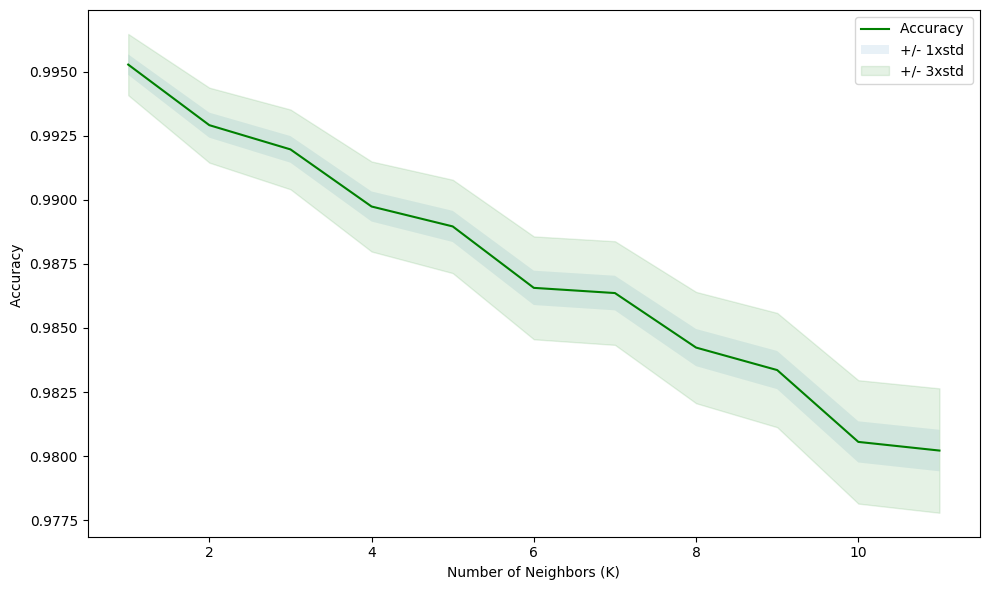

Fitting 3 folds for each of 12 candidates, totalling 36 fits
KNN model accuracy 100.0% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18280
           1       0.99      1.00      0.99     11345

    accuracy                           1.00     29625
   macro avg       1.00      1.00      1.00     29625
weighted avg       1.00      1.00      1.00     29625

########################################################################
--- 1116.6389124393463 seconds ---
Confusion Matrix:
[[18215    55]
 [   65 11290]]
########################################################################


In [ ]:
M.KNearestNeighbor()

In [ ]:
M.RandomForest()

RF accuracy: 99.99% 

########################################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18268
           1       1.00      1.00      1.00     11357

    accuracy                           1.00     29625
   macro avg       1.00      1.00      1.00     29625
weighted avg       1.00      1.00      1.00     29625

########################################################################
Confusion Matrix:
[[18268     2]
 [    0 11355]]
########################################################################
--- 21.346993684768677 seconds ---


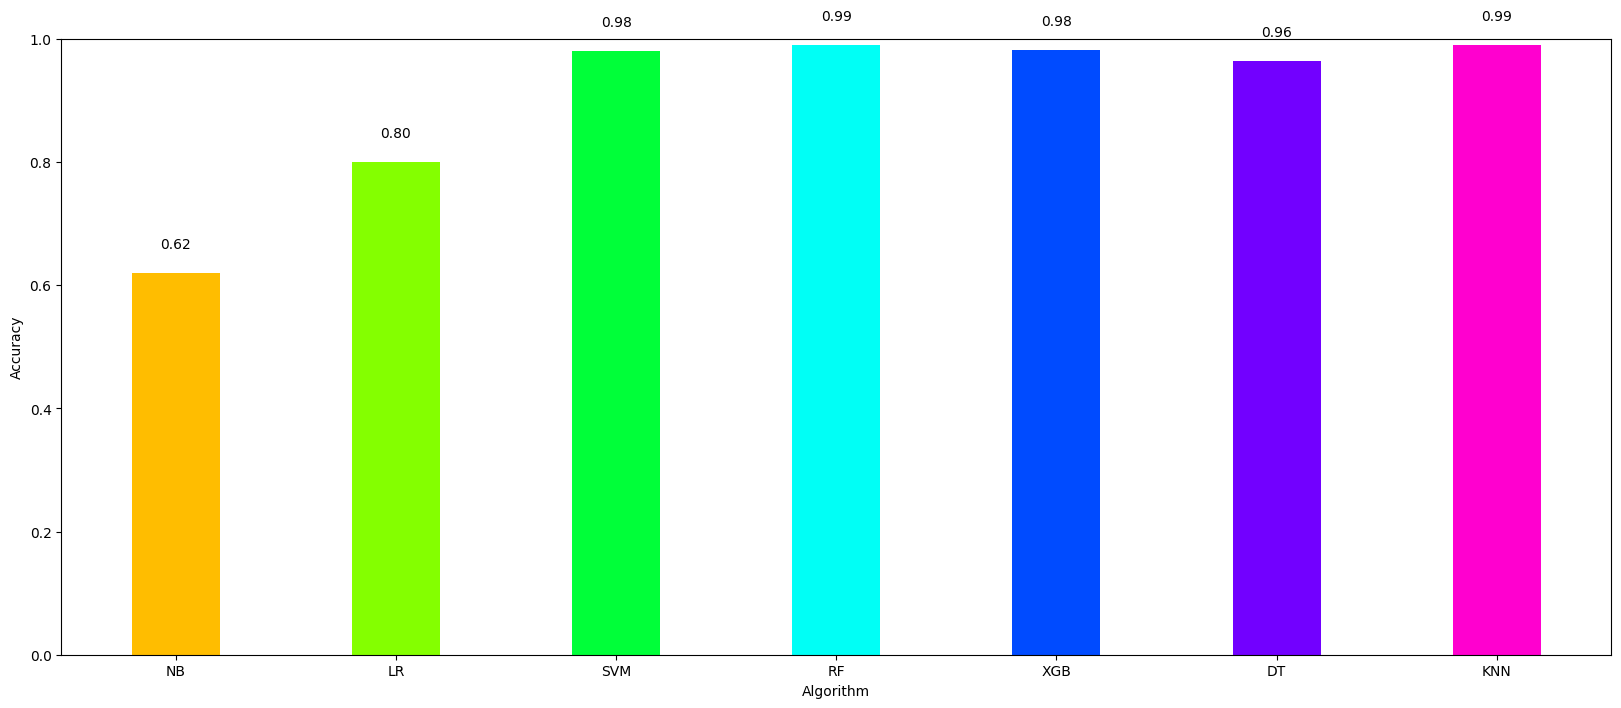

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_nb = 0.62
accuracy_lr = 0.80
accuracy_svm = 0.98
accuracy_rf = 0.99
accuracy_xgb = 0.9815
accuracy_dt = 0.9646
accuracy_knn = 0.99

accuracies = {
    'NB': accuracy_nb,
    'LR': accuracy_lr,
    'SVM': accuracy_svm,
    'RF': accuracy_rf,
    'XGB': accuracy_xgb,
    'DT' : accuracy_dt,
    'KNN': accuracy_knn}

colors = sns.color_palette("hsv", len(accuracies))

plt.figure(figsize=(20, 8))
bars = plt.bar(accuracies.keys(), accuracies.values(), width=0.4, color=colors)
plt.ylim(0, 1)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')

for i, (bar, v) in enumerate(zip(bars, accuracies.values())):
    plt.text(bar.get_x() + bar.get_width() / 2, v + 0.04, "{:.2f}".format(v), ha='center')

plt.show()


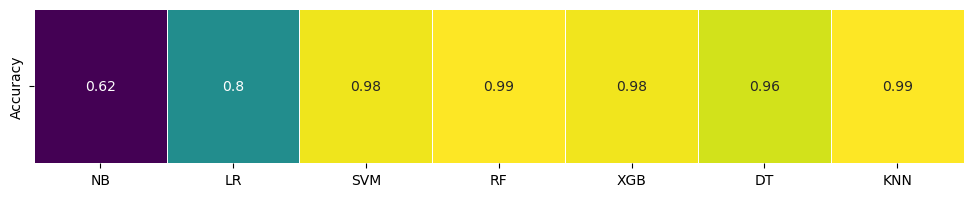

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = np.array(list(accuracies.values())).reshape(1, -1)

plt.figure(figsize=(12, 2))
sns.heatmap(data, annot=True, cmap="viridis", cbar=False, xticklabels=accuracies.keys(), yticklabels=['Accuracy'], linewidths=0.5)
plt.show()


# To compute and plot the ROC and AUC curves

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

xg_model = XGBClassifier(objective='binary:logistic', random_state=42)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:

probabilities = xg_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

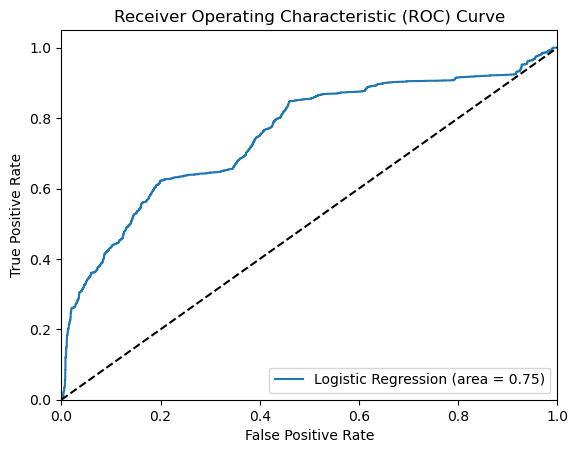

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

probabilities = log_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# AUC VS ROC

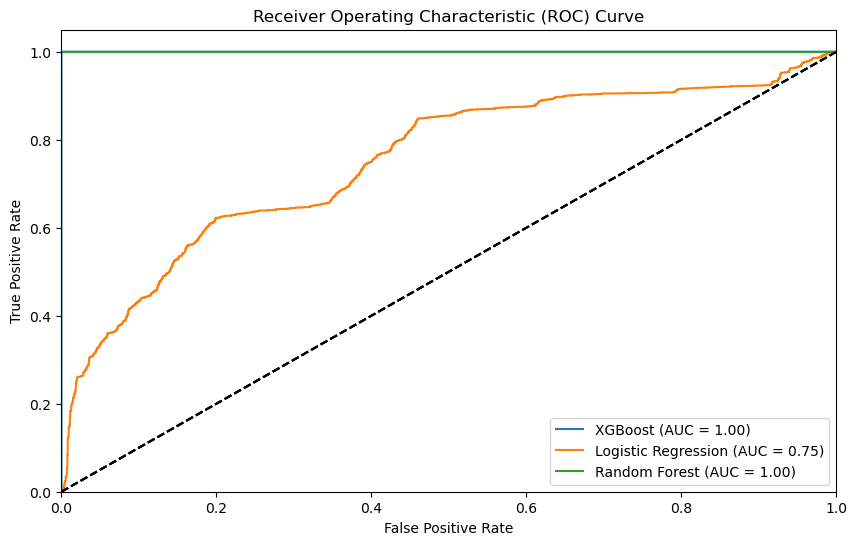

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import xgboost as xgb


def plot_roc_curve(name, fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

y_scores_lr = log_model.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

rf_decision_scores = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_decision_scores)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 6))
plot_roc_curve('XGBoost', fpr_xgb, tpr_xgb, roc_auc_xgb)
plot_roc_curve('Logistic Regression', fpr_lr, tpr_lr, roc_auc_lr)
plot_roc_curve('Random Forest', fpr_rf, tpr_rf, roc_auc_rf)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


def plot_roc_curve(name, fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(name, roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

y_scores_lr = log_model.decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

rf_decision_scores = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_decision_scores)
roc_auc_rf = auc(fpr_rf, tpr_rf)

svm_decision_scores = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_decision_scores)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(10, 6))
plot_roc_curve('XGBoost', fpr_xgb, tpr_xgb, roc_auc_xgb)
plot_roc_curve('Logistic Regression', fpr_lr, tpr_lr, roc_auc_lr)
plot_roc_curve('Random Forest', fpr_rf, tpr_rf, roc_auc_rf)
plot_roc_curve('SVM', fpr_svm, tpr_svm, roc_auc_svm)
plt.show()

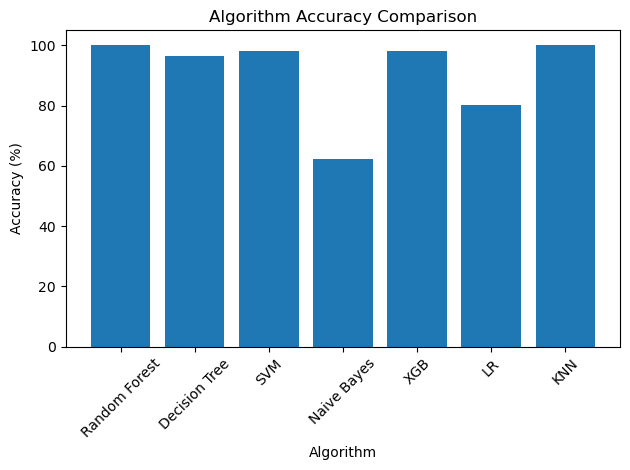

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

algorithms = ['Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'XGB', 'LR', 'KNN']
accuracy = [99.99, 96.46, 98, 62.23, 98.15, 80.08, 99.99]

plt.bar(algorithms, accuracy)

plt.title('Algorithm Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


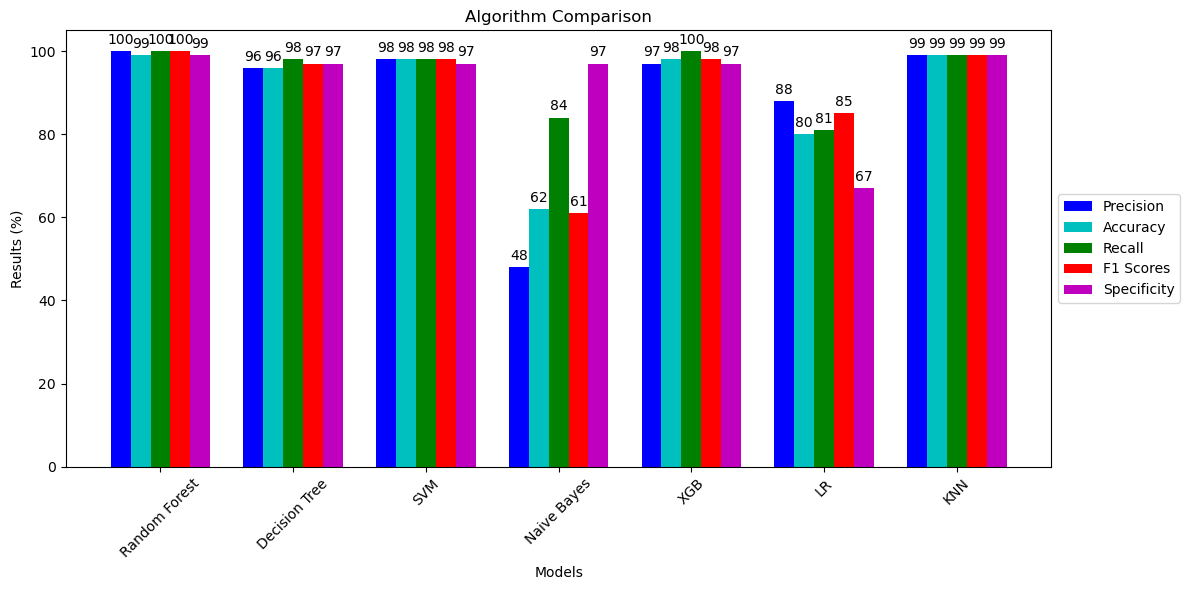

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

algorithms = ['Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'XGB', 'LR', 'KNN']

precision = [100, 96, 98, 48, 97, 88, 99]
accuracy = [99, 96, 98, 62, 98, 80, 99]
recall = [100, 98, 98, 84, 100, 81, 99]
f1_scores = [100, 97, 98, 61, 98, 85, 99]
specificity = [99, 97, 97, 97, 97, 67, 99]

x = np.arange(len(algorithms))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - 2*width, precision, width, label='Precision', color='b')
bars2 = ax.bar(x - width, accuracy, width, label='Accuracy', color='c')
bars3 = ax.bar(x, recall, width, label='Recall', color='g')
bars4 = ax.bar(x + width, f1_scores, width, label='F1 Scores', color='r')
bars5 = ax.bar(x + 2*width, specificity, width, label='Specificity', color='m')

ax.set_title('Algorithm Comparison')
ax.set_xlabel('Models')
ax.set_ylabel('Results (%)')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45)

for bars in [bars1, bars2, bars3, bars4, bars5]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval}', ha='center', va='bottom')

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


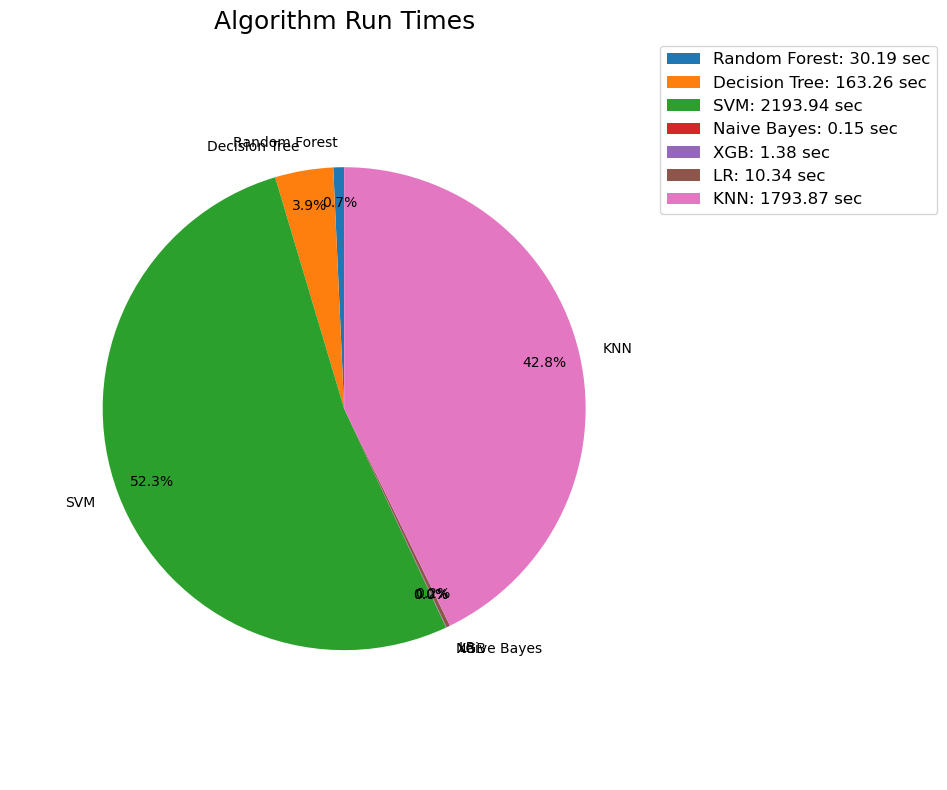

In [ ]:
import matplotlib.pyplot as plt

algorithms = ['Random Forest', 'Decision Tree', 'SVM', 'Naive Bayes', 'XGB', 'LR', 'KNN']
run_times = [30.19, 163.26, 2193.94, 0.15, 1.38, 10.34, 1793.87]

fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(run_times, labels=algorithms, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

ax.set_title('Algorithm Run Times', fontsize=18)
ax.axis('equal')

legend_labels = ['{}: {:.2f} sec'.format(alg, time) for alg, time in zip(algorithms, run_times)]
ax.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.4, 1.0), fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()